In [10]:
serie2 = '../data/submissions/serie2.csv'
SUBMISSIONS = {
    'lgbm': serie2,
    'autogluon': '../data/submissions/serie3.csv',
    'automl': '../data/submissions/serie4.csv',
    'xgb': '../data/submissions/serie5.csv',
    'best_1dcnn': '../data/submissions/submission_405.csv',
    'best_gnn': '../data/submissions/best_gnn.csv',
}

SUBMISSIONS = {
    'lgbm': serie2,
    'autogluon': '../data/submissions/serie3.csv',
    'automl': '../data/submissions/serie4.csv',
    'xgb': '../data/submissions/xgb_398.csv',
    'their_xgb': '../data/submissions/serie5.csv',
    '1dcnn': '../data/submissions/submission_409_morning_sweep.csv',
}

# SUBMISSIONS = {
#     '435': '../data/submissions/submission_435.csv',
#     '430': '../data/submissions/submission_430.csv',
#     '405': '../data/submissions/submission_405.csv',
#     'best_1dcnn': '../data/submissions/best_1dcnn.csv',
# }

# Unknown
# SUBMISSIONS = {
#     'morning-sweep': '../data/submissions/u_090_morning_sweep_409.csv',
#     'ensemble': '../data/submissions/u_125_submission_443.csv',
#     'pseudo' : '../data/submissions/u_bbstrat.csv',
#     'xgb': '../data/submissions/u_xgb_344.csv',
# }


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Load test parquet
test_data = pd.read_parquet('../data/raw/test.parquet')

In [13]:
test_data = test_data.drop(columns=['buildingblock1_smiles', 'buildingblock2_smiles', 'buildingblock3_smiles', 'molecule_smiles'])

In [14]:
# Add submissions
for submission_name, submission_path in SUBMISSIONS.items():
    submission = pd.read_csv(submission_path)
    test_data[submission_name + '_binds'] = submission['binds']

In [15]:
test_data

,id,protein_name,lgbm_binds,autogluon_binds,automl_binds,xgb_binds,their_xgb_binds,1dcnn_binds
0,295246830,BRD4,1.193881e-04,0.578972,0.399911,0.000247,0.381680,9.163079e-04
1,295246831,HSA,7.478893e-04,0.440510,0.144902,0.000668,0.341728,1.806560e-03
2,295246832,sEH,6.616116e-06,0.315976,0.013430,0.000067,0.179440,1.365105e-06
3,295246833,BRD4,6.720424e-05,0.592061,0.329299,0.000099,0.400709,5.590133e-04
4,295246834,HSA,8.293390e-04,0.452710,0.522435,0.000443,0.380798,1.509562e-03
...,...,...,...,...,...,...,...,...
1674891,296921721,HSA,9.614229e-05,0.011993,0.016106,0.000064,0.015900,2.083325e-05
1674892,296921722,sEH,1.025200e-05,0.002741,0.008737,0.000154,0.010117,4.616727e-05
1674893,296921723,BRD4,4.112720e-06,0.000198,0.001949,0.000023,0.006538,2.544840e-06
1674894,296921724,HSA,1.814961e-04,0.011480,0.010086,0.000508,0.022120,7.054859e-05


,lgbm_binds,autogluon_binds,automl_binds,xgb_binds,their_xgb_binds,1dcnn_binds
lgbm_binds,1.000000,0.198900,0.348630,0.807072,0.294129,0.816659
autogluon_binds,0.198900,1.000000,0.430915,0.207313,0.917932,0.226660
automl_binds,0.348630,0.430915,1.000000,0.388088,0.687864,0.399193
xgb_binds,0.807072,0.207313,0.388088,1.000000,0.315835,0.922943
their_xgb_binds,0.294129,0.917932,0.687864,0.315835,1.000000,0.331515
1dcnn_binds,0.816659,0.226660,0.399193,0.922943,0.331515,1.000000


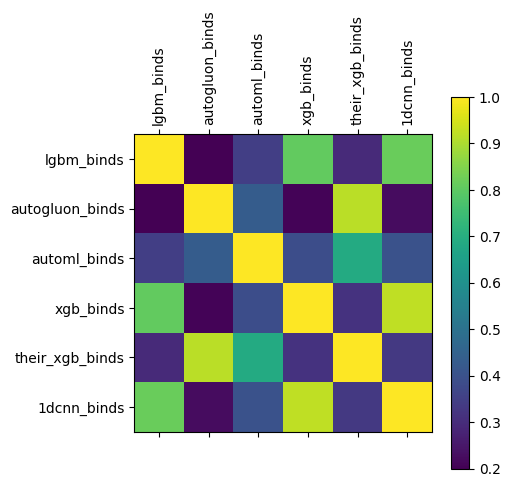

In [16]:
# Calculate similarity between submissions
submissions = test_data[[name + '_binds' for name in SUBMISSIONS.keys()]]
display(submissions.corr())
# Draw correlation matrix with labels
plt.matshow(submissions.corr())
plt.xticks(range(submissions.shape[1]), submissions.columns, fontsize=10, rotation=90)
plt.yticks(range(submissions.shape[1]), submissions.columns, fontsize=10)
plt.colorbar()
plt.show()

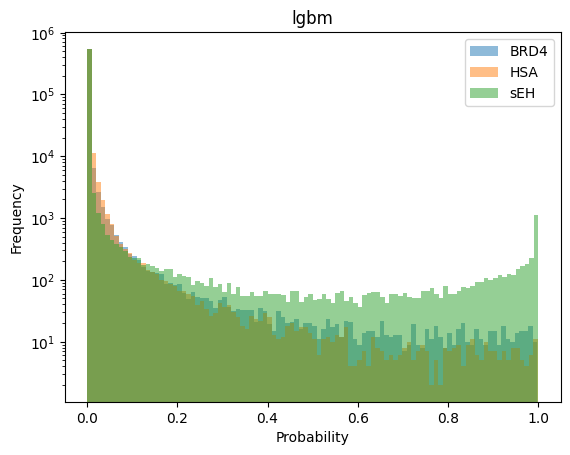

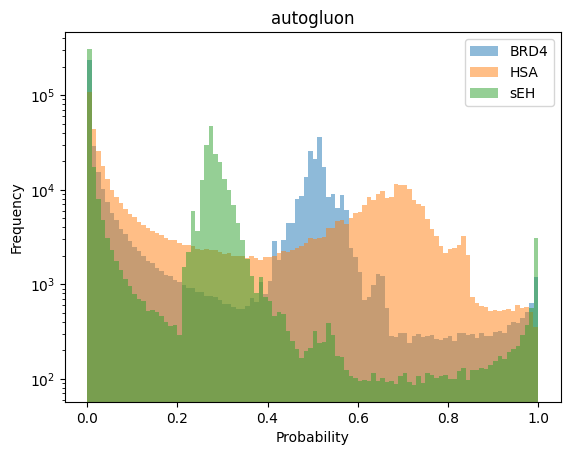

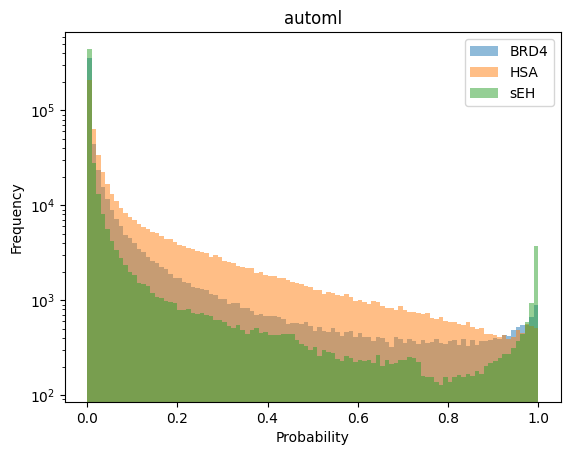

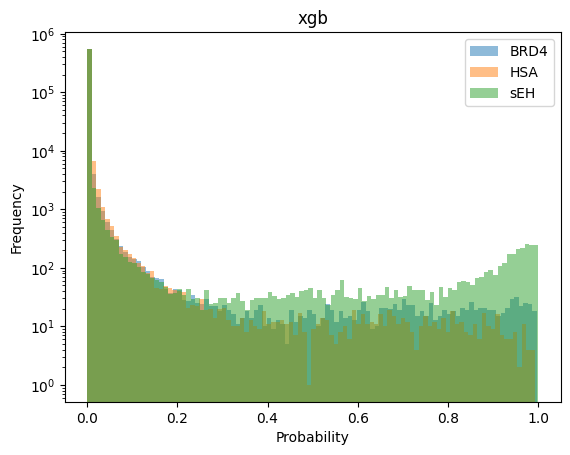

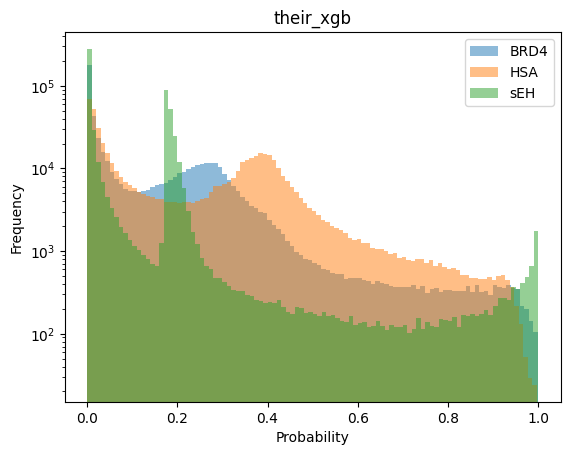

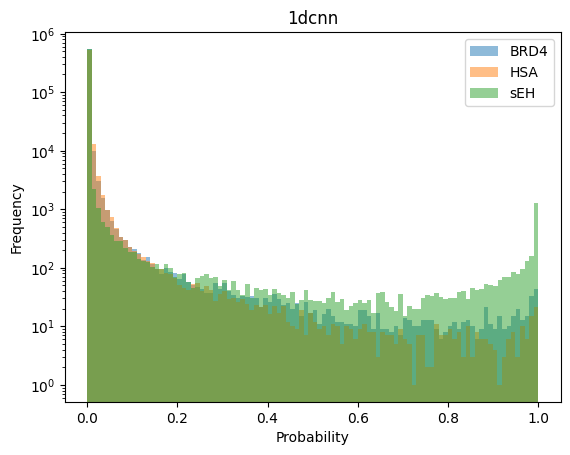

In [17]:
# Plot histogram of binding affinity to frequency for each submission and split on protein name
for submission_name in SUBMISSIONS.keys():
    plt.figure()
    plt.hist(test_data[test_data['protein_name'] == "BRD4"][submission_name + '_binds'], alpha=0.5, bins=100, label='BRD4')
    plt.hist(test_data[test_data['protein_name'] == "HSA"][submission_name + '_binds'], alpha=0.5, bins=100, label='HSA')
    plt.hist(test_data[test_data['protein_name'] == "sEH"][submission_name + '_binds'], alpha=0.5, bins=100, label='sEH')
    plt.yscale('log')
    plt.title(submission_name)
    plt.legend(loc="upper right")
    plt.xlabel("Probability")
    plt.ylabel("Frequency")
    plt.show()